# 🌠 Stellar Classification - SDSS17

![SegmentLocal](./Assets/giphy.gif "segment")

## 🚀 Introduction

In astronomy today we have the challenge of classifying data, as new data is observed all the time.

In this projecet we will build a model that will classify stars beased on their spectra. Using a dataset from the Sloan Digital Sky Survey (SDSS), the kinda of stars we will be classifying are:

- Stars
- Galaxies
- Quasars

The dataset contains 100,000 observations of space taken by the SDSS. Each observation has 17 features columns and 1 class whic identifies it to be either a star, galaxy or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

### Table of Object Classes

| Class                        | Description | Image                                   |
|------------------------------| --- |-----------------------------------------|
| Galaxy                       | A galaxy is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. | ![Galaxy](./Assets/sombrero-galaxy.jpg) |
| Star                         | A star is an astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. | ![Star](./Assets/star.jpg) |
| Quasar (Quasi-Stellar Radio Source) | A quasar is an extremely luminous active galactic nucleus (AGN), in which a supermassive black hole with mass ranging from millions to billions of times the mass of the Sun is surrounded by a gaseous accretion disk. | ![Quasar](./Assets/quasar.jpg) |

## 📓 About Notebook

This notebook contains the study case to apply the knowledge acquired in the course of Machine Learning for Data Science.

The project will compare the classicals machine learning algorithms with the deep learning algorithms.

- KNN (K-Nearest Neighbors)
- Decision Tree
- Random Forest
- Deep Learning (Neural Networks)

### Topics

1. [Importing Libraries](#Importing-Libraries)
2. [Importing Dataset](#Importing-Dataset)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Feature Selection](#Feature-Selection)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Models](#Models)
    - [KNN](#KNN)
        - [KNN - K-Fold Cross Validation](#KNN---K-Fold-Cross-Validation)
        - [Training and Predicting](#Training-and-Predicting)
        - [KNN - Evaluation](#KNN---Evaluation)
        - [KNN - Confusion Matrix](#KNN---Confusion-Matrix)
        - [KNN - ROC Curve](#KNN---ROC-Curve)
    - [Decision Tree](#Decision-Tree)
        - [Decision Tree - K-Fold Cross Validation](#Decision-Tree---K-Fold-Cross-Validation)
        - [Training and Predicting](#Training-and-Predicting)
        - [Decision Tree - Evaluation](#Decision-Tree---Evaluation)
        - [Decision Tree - Confusion Matrix](#Decision-Tree---Confusion-Matrix)
        - [Decision Tree - ROC Curve](#Decision-Tree---ROC-Curve)
7. [Conclusion](#Conclusion)
8. [Next Steps](#Next-Steps)
9. [References](#References)

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

from collections import Counter

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree

import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

## Importing Dataset

In [3]:
df = pd.read_csv('./Input/stellar-classification-dataset-sdss17/star_classification.csv')

In [4]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

In [8]:
df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

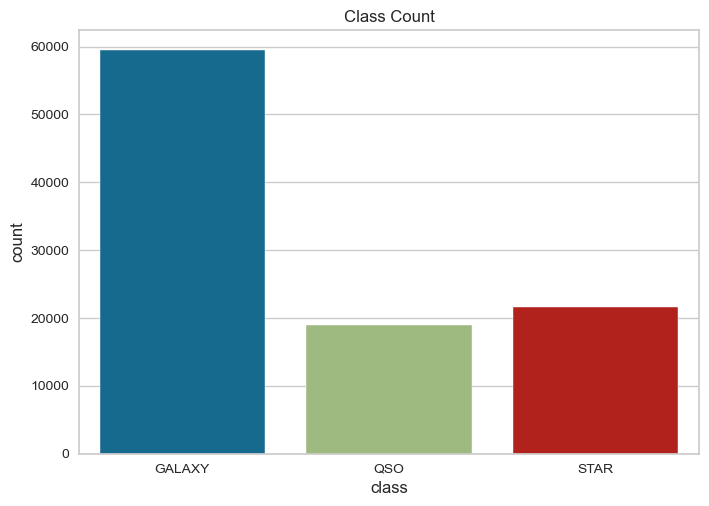

In [9]:
sns.countplot(x='class', data=df)
plt.title('Class Count')
plt.show()

### Explorting Features

In [9]:
def plot_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df['class'] == 'STAR'][feature], label='Star')
    sns.kdeplot(df[df['class'] == 'GALAXY'][feature], label='Galaxy')
    sns.kdeplot(df[df['class'] == 'QSO'][feature], label='QSO')
    sns.kdeplot(df[feature], label='Total')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

In [10]:
def log_plot_feature(feature):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(np.log(df[df['class'] == 'STAR'][feature]), label='Star')
    sns.kdeplot(np.log(df[df['class'] == 'GALAXY'][feature]), label='Galaxy')
    sns.kdeplot(np.log(df[df['class'] == 'QSO'][feature]), label='QSO')
    sns.kdeplot(np.log(df[feature]), label='Total')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

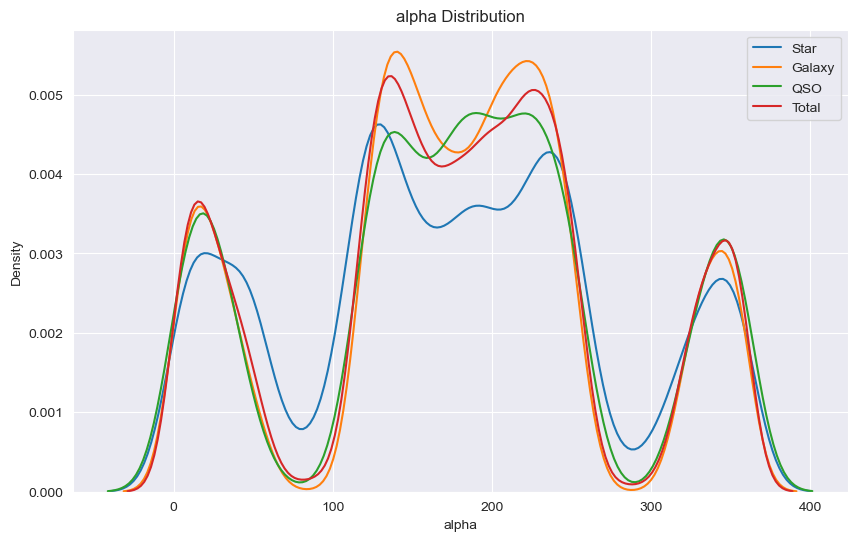

In [10]:
plot_feature('alpha')

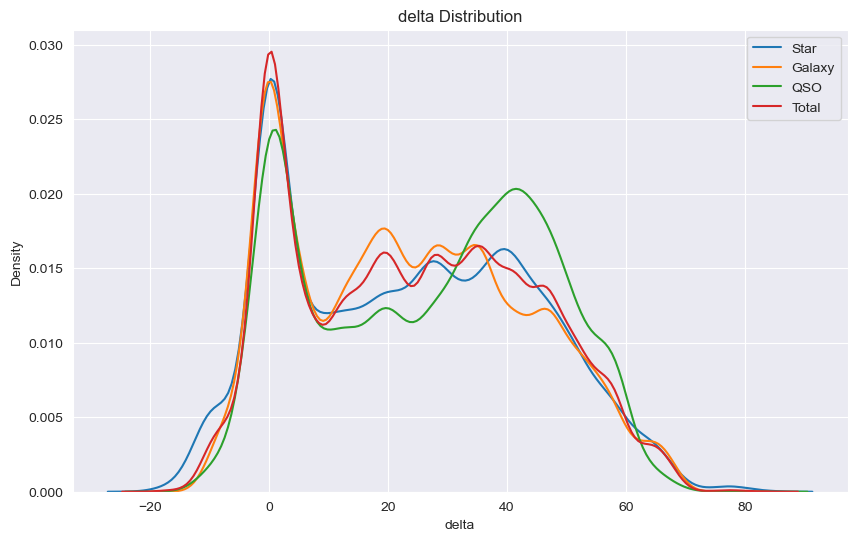

In [11]:
plot_feature('delta')

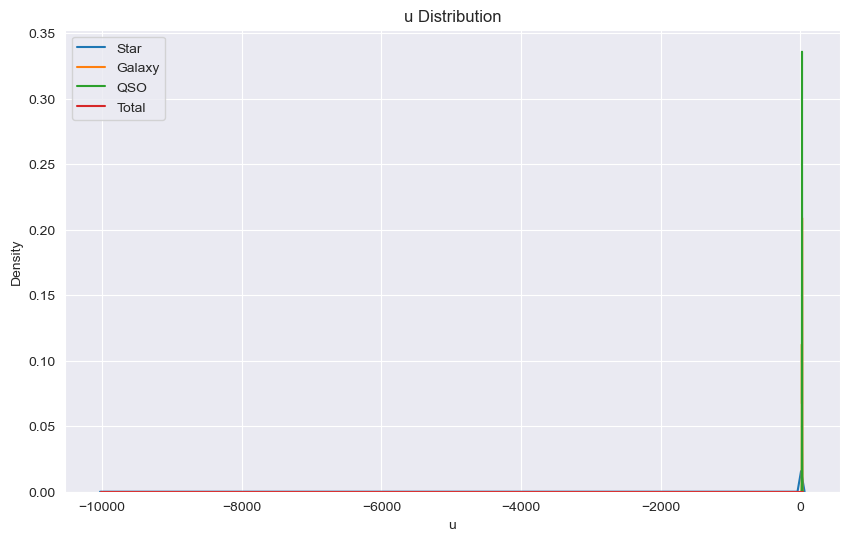

In [12]:
plot_feature('u')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


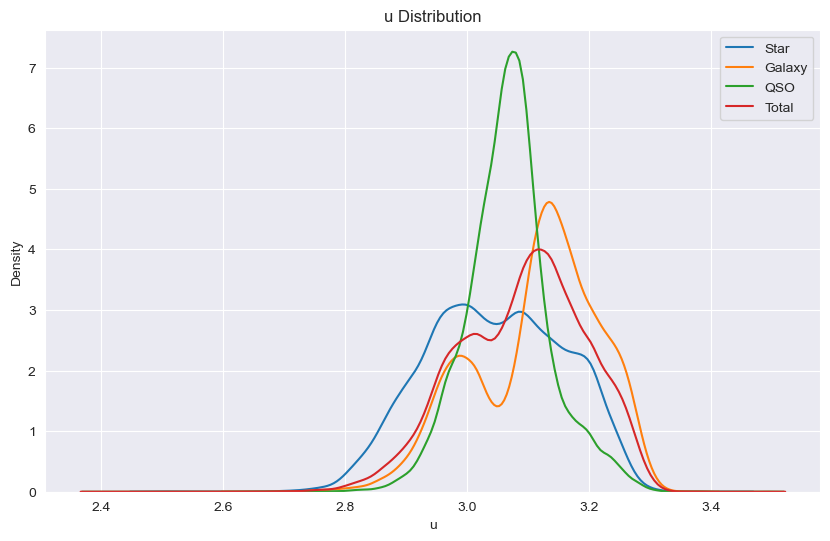

In [13]:
log_plot_feature('u')

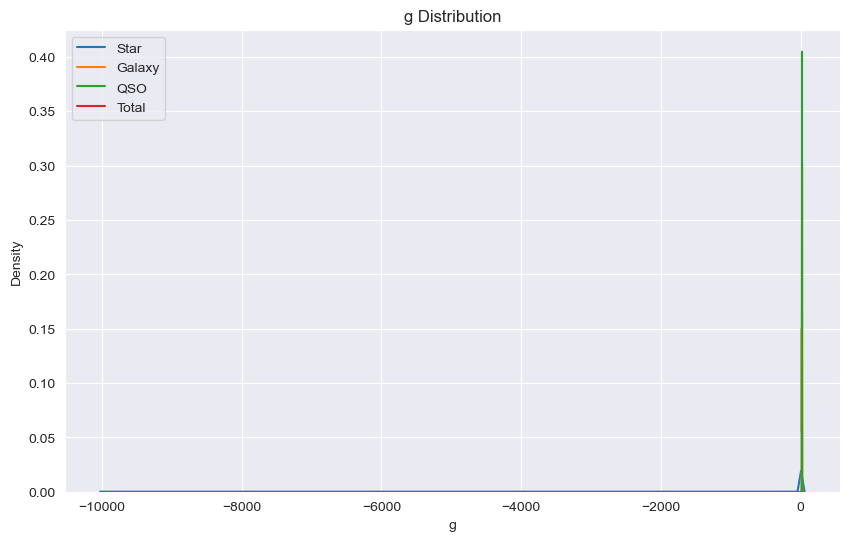

In [14]:
plot_feature('g')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


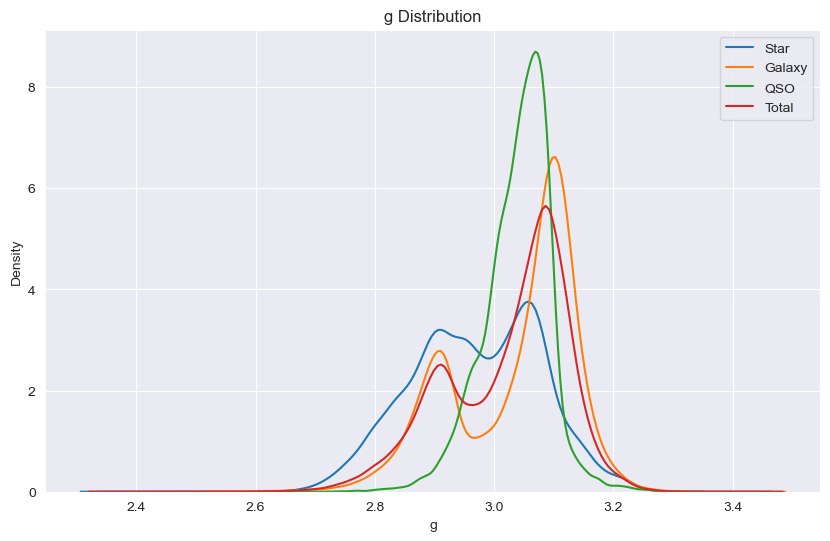

In [15]:
log_plot_feature('g')

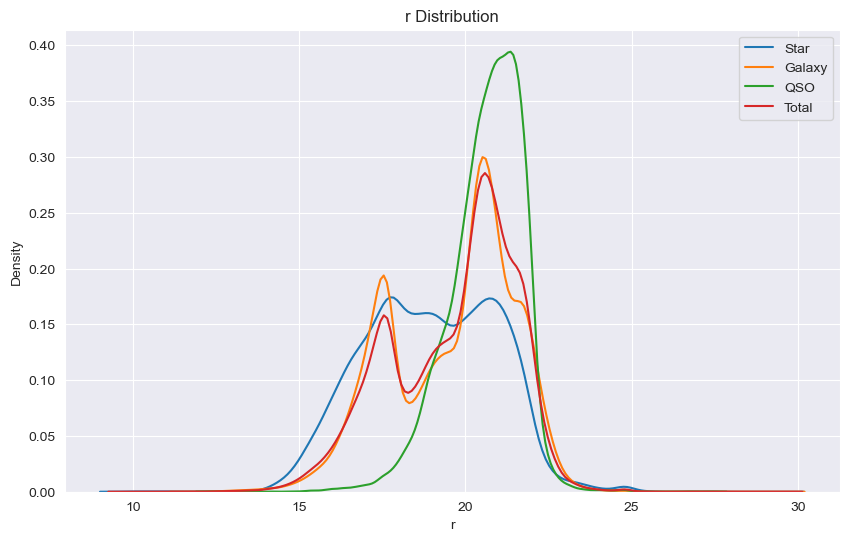

In [16]:
plot_feature('r')

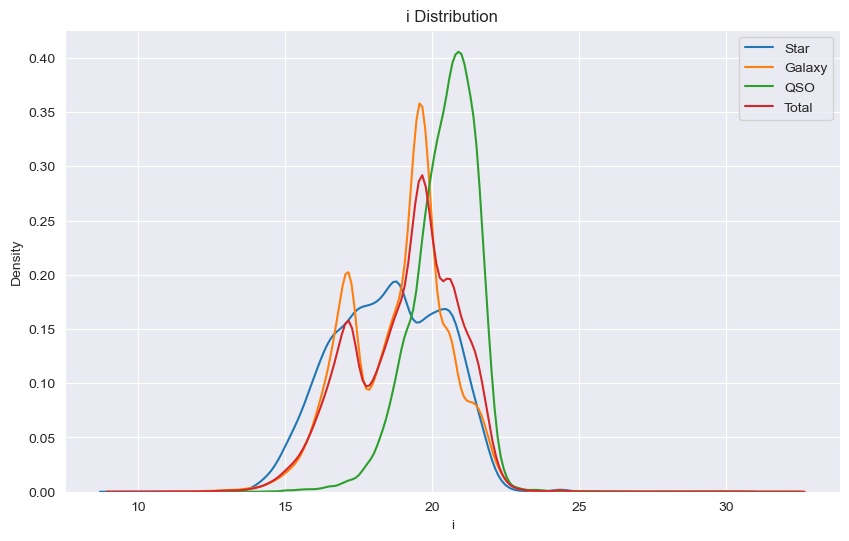

In [17]:
plot_feature('i')

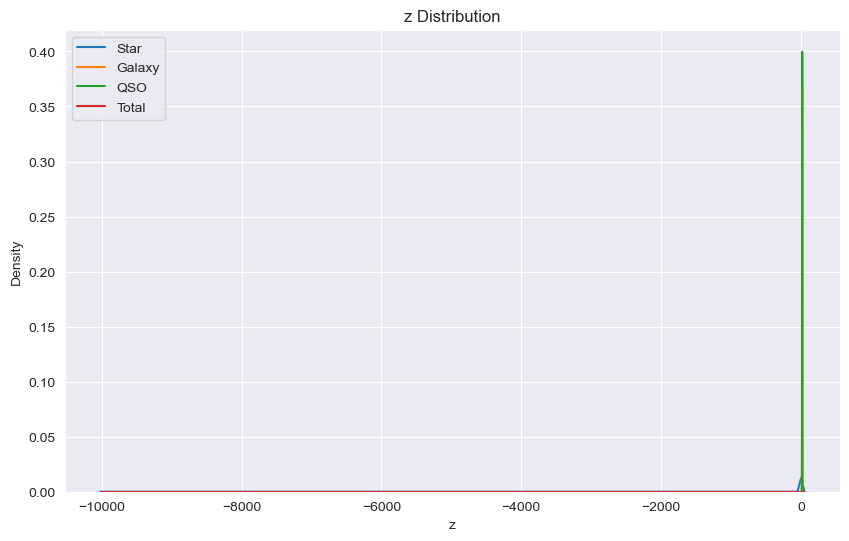

In [18]:
plot_feature('z')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


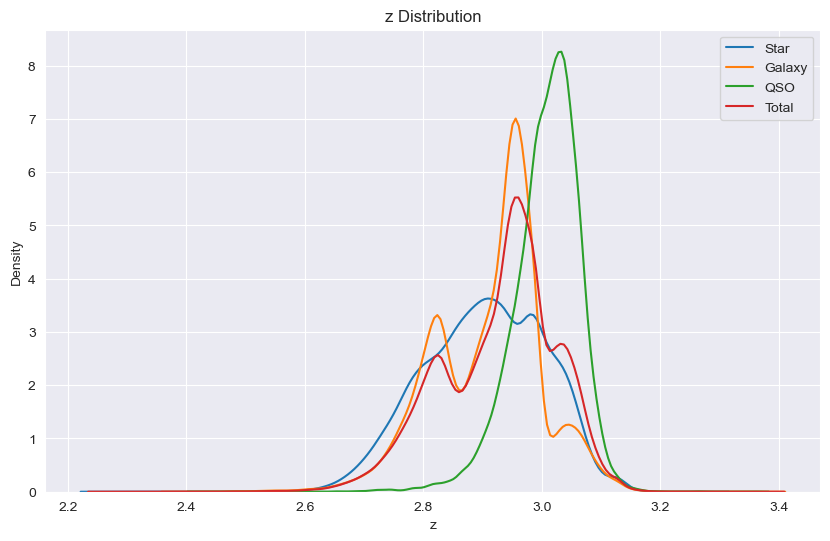

In [19]:
log_plot_feature('z')

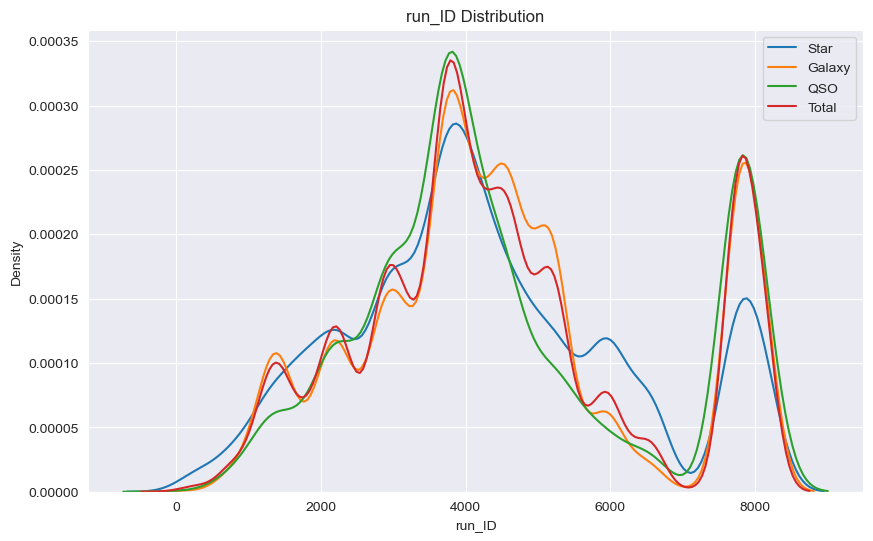

In [20]:
plot_feature('run_ID')

In [21]:
df['rerun_ID'].value_counts()

301    100000
Name: rerun_ID, dtype: int64

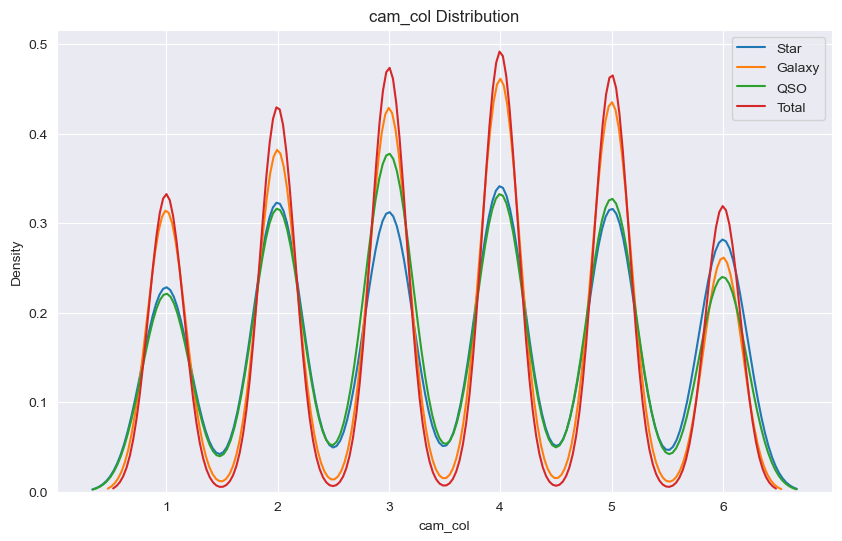

In [22]:
plot_feature('cam_col')

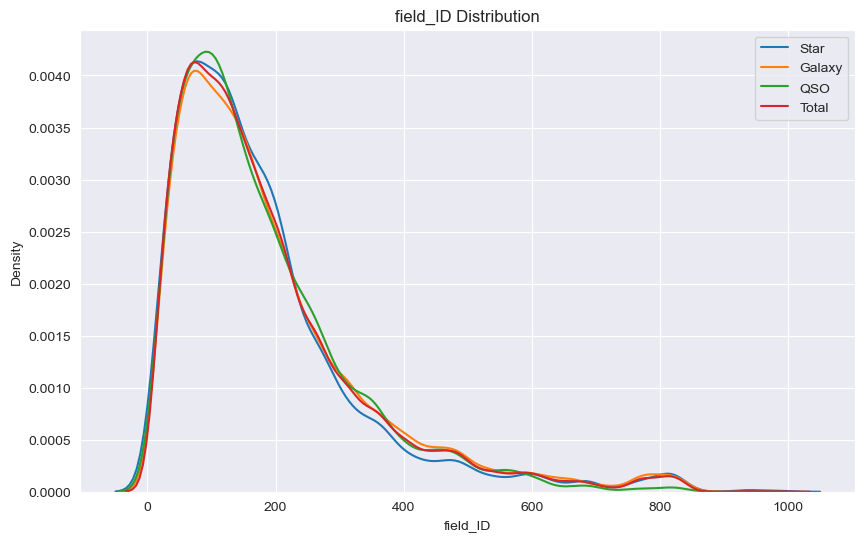

In [23]:
plot_feature('field_ID')

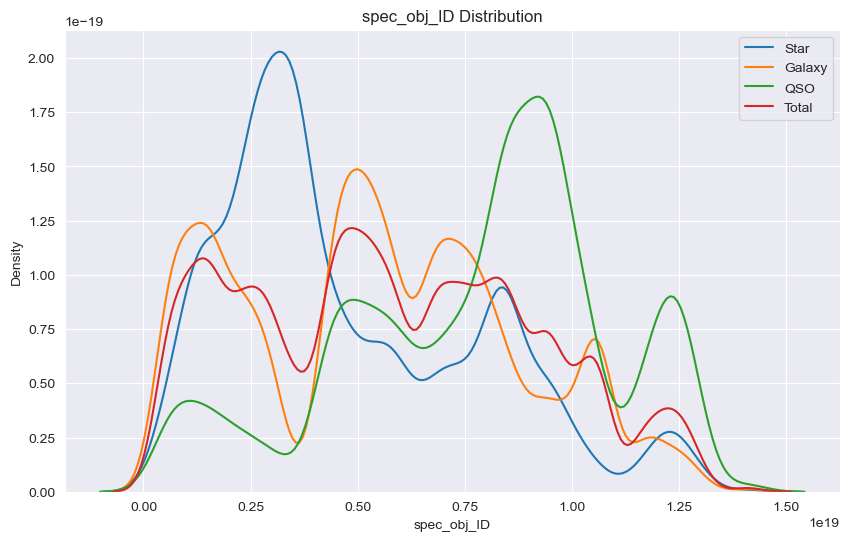

In [24]:
plot_feature('spec_obj_ID')

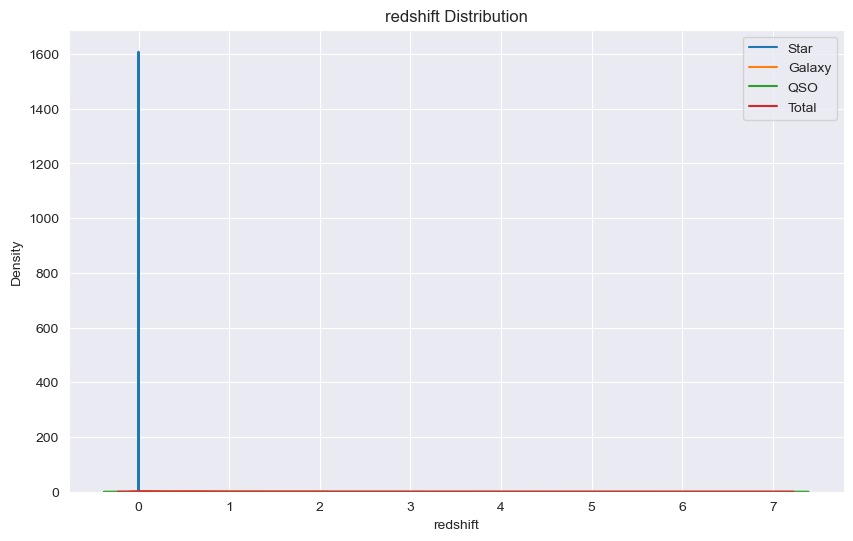

In [25]:
plot_feature('redshift')

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


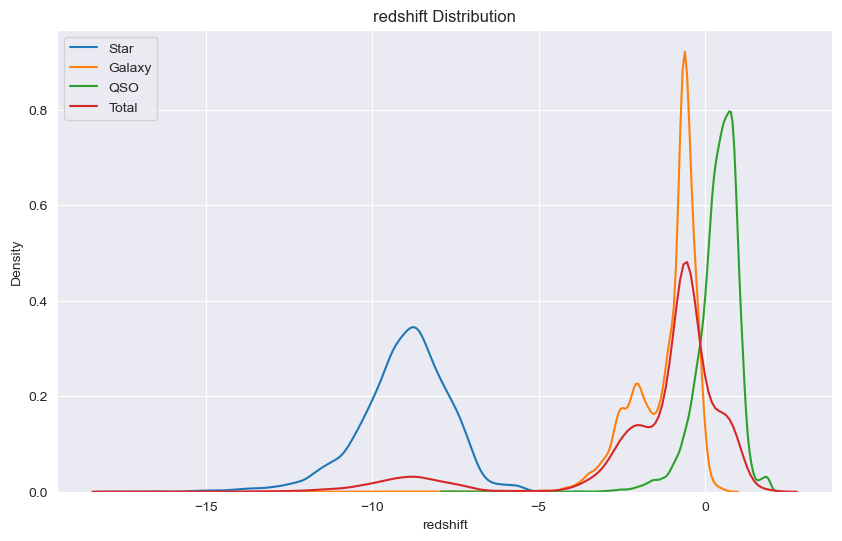

In [26]:
log_plot_feature('redshift')

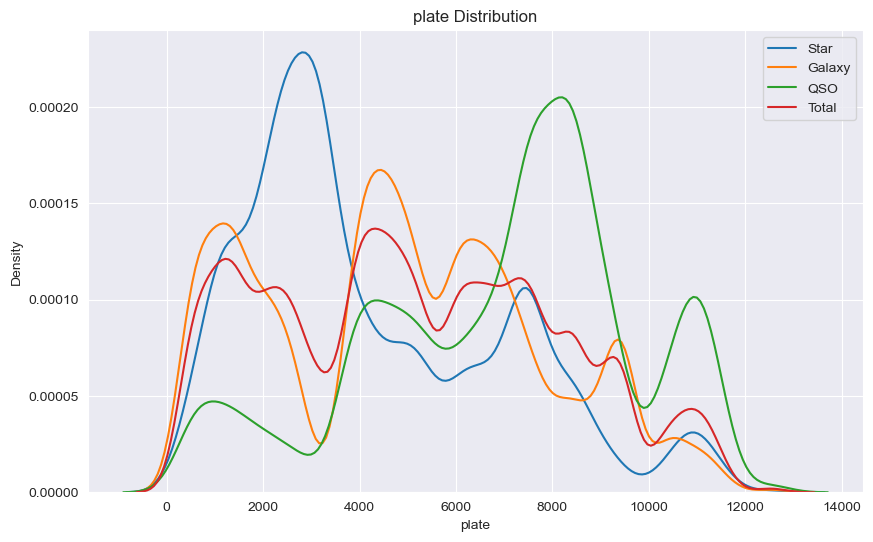

In [27]:
plot_feature('plate')

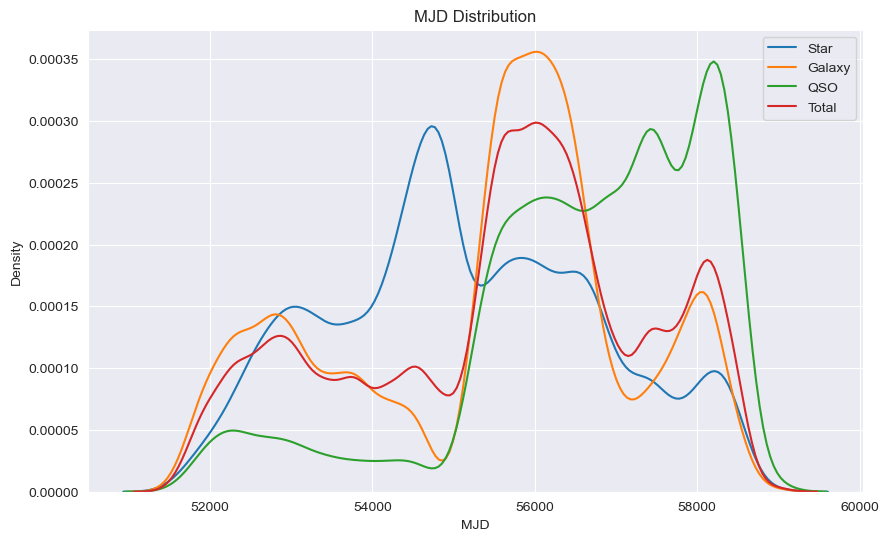

In [28]:
plot_feature('MJD')

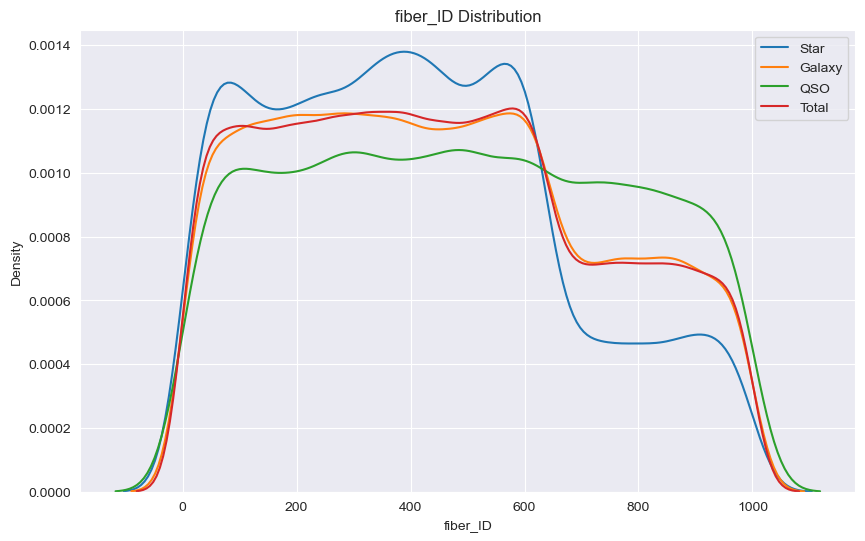

In [29]:
plot_feature('fiber_ID')

### Correlation Matrix

Compare the correlation between the features and the class.

Using the Pearson correlation coefficient.

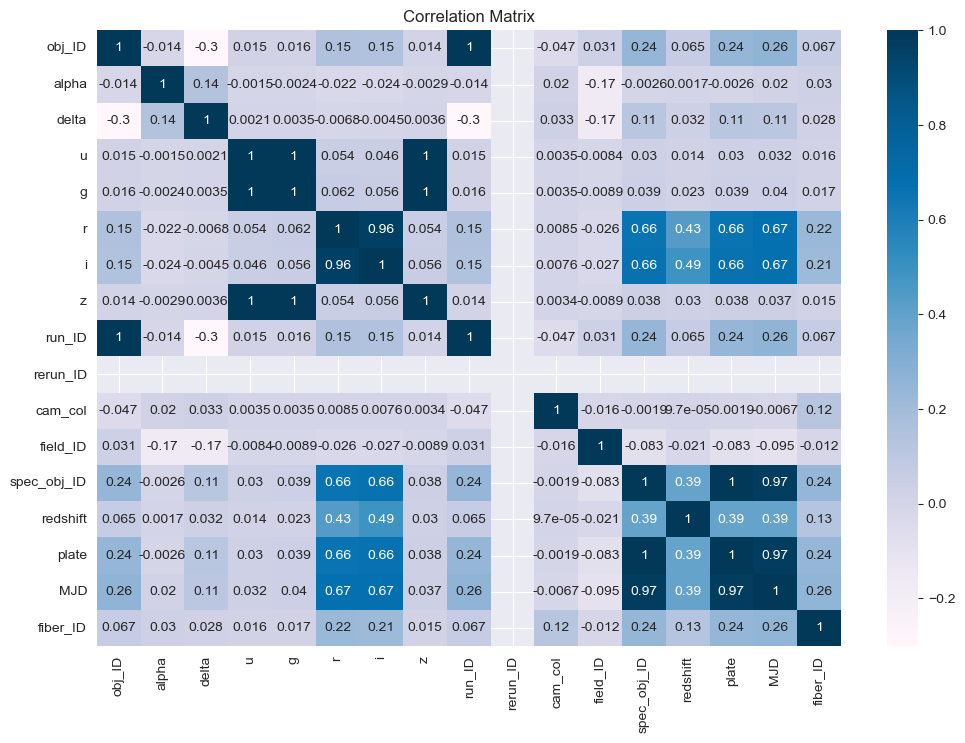

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='PuBu')
plt.title('Correlation Matrix')
plt.show()

Using the Spearman correlation coefficient.

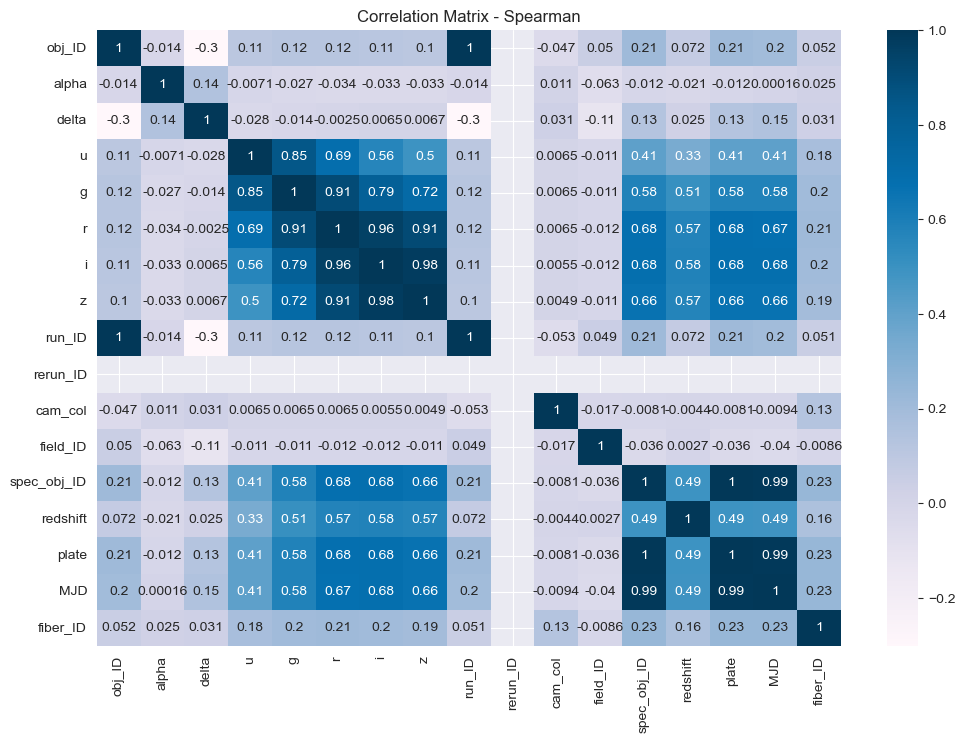

In [31]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr('spearman', numeric_only=True), annot=True, cmap='PuBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

## Feature Selection

### Droping Features

In [5]:
df.drop(['obj_ID', 'rerun_ID', 'run_ID', 'field_ID', 'spec_obj_ID', 'fiber_ID', 'r', 'i', 'MJD'], axis=1, inplace=True)

In [6]:
df.head()

alpha      delta         u         g         z  cam_col   class  \
0  135.689107  32.494632  23.87882  22.27530  18.79371        2  GALAXY   
1  144.826101  31.274185  24.77759  22.83188  21.61427        5  GALAXY   
2  142.188790  35.582444  25.26307  22.66389  18.94827        2  GALAXY   
3  338.741038  -0.402828  22.13682  23.77656  19.25010        3  GALAXY   
4  345.282593  21.183866  19.43718  17.58028  15.54461        3  GALAXY   

   redshift  plate  
0  0.634794   5812  
1  0.779136  10445  
2  0.644195   4576  
3  0.932346   9149  
4  0.116123   6121

## Preprocessing

### Encoding Class

In [7]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

df.head()

alpha      delta         u         g         z  cam_col  class  \
0  135.689107  32.494632  23.87882  22.27530  18.79371        2      0   
1  144.826101  31.274185  24.77759  22.83188  21.61427        5      0   
2  142.188790  35.582444  25.26307  22.66389  18.94827        2      0   
3  338.741038  -0.402828  22.13682  23.77656  19.25010        3      0   
4  345.282593  21.183866  19.43718  17.58028  15.54461        3      0   

   redshift  plate  
0  0.634794   5812  
1  0.779136  10445  
2  0.644195   4576  
3  0.932346   9149  
4  0.116123   6121

In [8]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

### Data Balancing

#### SMOTE

In [8]:
x = df.drop('class', axis=1)
y = df['class']

In [9]:
smote = SMOTE(random_state=42)

print('Before SMOTE: %s' % Counter(y))

x_smote, y_smote = smote.fit_resample(x, y)

print('After SMOTE: %s' % Counter(y_smote))

Before SMOTE: Counter({0: 59445, 2: 21594, 1: 18961})
After SMOTE: Counter({0: 59445, 1: 59445, 2: 59445})


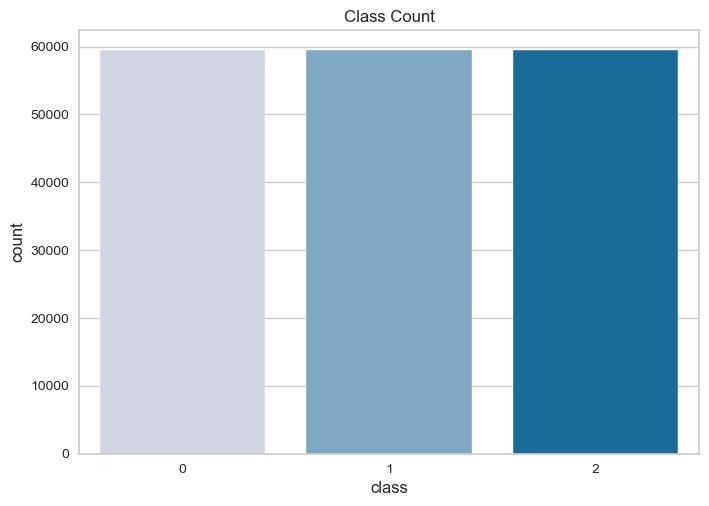

In [11]:
sns.countplot(x=y_smote, palette='PuBu')
plt.title('Class Count')
plt.show()

#### Spliting Dataset

Splint dataset between train and test with 70% and 30% respectively.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

Splint dataset between train and validation with 80% and 20% respectively.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

### Scaling Features

In [12]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
X_val_sc = scaler.transform(X_val)

In [13]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)
X_val_sc = pd.DataFrame(X_val_sc, columns=X_val.columns)

In [14]:
X_train_sc.head()

alpha     delta         u         g         z   cam_col  redshift  \
0 -1.522102 -0.230780  1.228811  0.202085  0.533856 -1.569037 -0.813458   
1  0.569770  0.641822  0.461658  0.672150 -0.127911  1.654172 -0.292255   
2  0.357792 -0.418239 -0.403086 -0.044828  0.501603  1.009530  1.736887   
3 -1.317958 -1.259997  0.772663  0.143205 -0.569279 -0.279753 -0.813008   
4 -0.236385  0.671652  1.117774  1.172616  0.524195 -0.279753 -0.813175   

      plate  
0 -0.088535  
1 -0.132115  
2  0.026237  
3 -0.729261  
4  1.157653

In [22]:
X_test_sc.head()

alpha     delta         u         g         z   cam_col  redshift  \
0 -0.350786 -0.419297  1.100859  0.753062 -0.014459 -0.924395 -0.200446   
1 -0.525788  0.502495  0.062875  0.469757  1.043192  1.009530 -0.813020   
2  0.640561 -0.257691  0.069475  0.304642  0.787148 -0.924395  1.753570   
3 -0.539972  1.344952  1.720037  1.597356  0.459051  1.009530 -0.013985   
4 -0.422796  0.959315  0.872868  0.166834 -1.142273  0.364888 -0.813352   

      plate  
0 -0.021003  
1 -0.537642  
2 -0.480755  
3  0.643342  
4 -1.511704

In [23]:
X_val_sc.head()

alpha     delta         u         g         z   cam_col  redshift  \
0 -1.680378 -0.252315 -0.399037  0.159594  0.620123 -0.924395  0.456386   
1  0.853718  0.184114 -1.059488 -1.277526 -1.054248  0.364888 -0.813225   
2 -0.214973 -0.135740  0.878271  0.735328  0.428454 -0.279753  1.012291   
3  1.731062 -0.199146  0.705706  1.909974  0.448995 -0.924395 -0.008312   
4 -0.646815  1.187897  0.641795  0.825943 -0.048373  1.009530 -0.813156   

      plate  
0  0.746471  
1 -1.062265  
2  1.409818  
3  0.248461  
4  1.756129

## Models

### KNN

#### Choosing K

Using the cross validation method to choose the best K.

In [54]:
hyperParamsK = [1, 2, 3, 5, 8, 13, 21, 34, 55]
bestk, bestAcc = 0, 0
meanAccs = []

for k in hyperParamsK:
    accuracies = []

    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, validation_index in k_fold.split(X_train_sc):
        X_train_fold, X_validation_fold = X_train_sc.iloc[train_index], X_train_sc.iloc[validation_index]
        y_train_fold, y_validation_fold = y_train.iloc[train_index], y_train.iloc[validation_index]

        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_validation_fold)
        acc = accuracy_score(y_validation_fold, y_pred)
        accuracies.append(acc)

    meanAcc = np.mean(accuracies)
    meanAccs.append(meanAcc)

    if meanAcc > bestAcc:
        bestAcc = meanAcc
        bestk = k

print('Mean Accuracies: ', meanAccs)
print(f'Best K: {bestk}')
print(f'Best Accuracy: {bestAcc}')

Mean Accuracies:  [0.9457778875618462, 0.9333513706004357, 0.9451570509343515, 0.9421129945271917, 0.9363953889066952, 0.9344427889436059, 0.9289655172863259, 0.9231277539587825, 0.9179208302491031]
Best K: 1
Best Accuracy: 0.9457778875618462


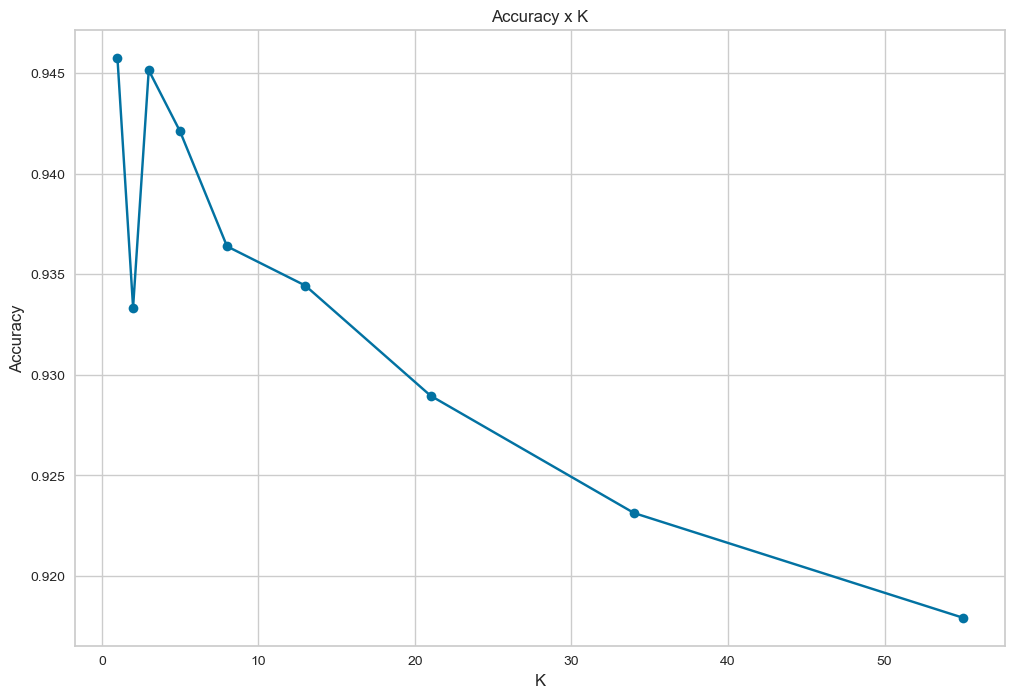

In [55]:
plt.figure(figsize=(12, 8))
plt.plot(hyperParamsK, meanAccs, 'bo-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy x K')
plt.show()

#### Choosing metrics

Using the Grid search cv method to choose the best metric.

In [56]:
parameters = {'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
                'n_neighbors': [1, 2, 3, 5, 8, 13, 21, 34, 55]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_metric = grid_search.best_params_['metric']
best_k = grid_search.best_params_['n_neighbors']

print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Metric: {best_metric}')
print(f'Best K: {best_k}')

Best Accuracy: 0.9524266987428123
Best Metric: manhattan
Best K: 1


In [57]:
model = KNeighborsClassifier(n_neighbors=bestk, metric=best_metric)
model.fit(X_train_sc, y_train)
y_pred = model.predict(X_test_sc)

print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      GALAXY       0.94      0.93      0.93     17833
         QSO       0.97      0.97      0.97     17834
        STAR       0.96      0.97      0.96     17834

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


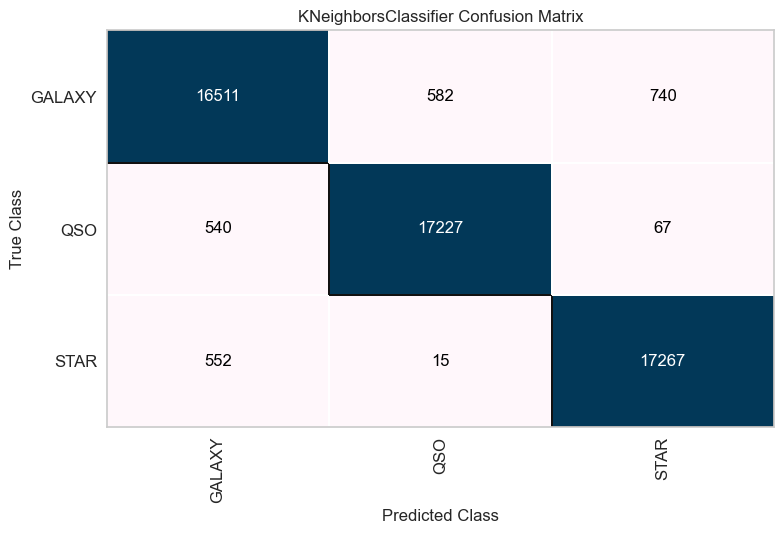

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [58]:
cm = ConfusionMatrix(model, classes=le.classes_, cmap='PuBu')

cm.fit(X_train_sc, y_train)
cm.score(X_test_sc, y_test)
cm.show()

### ROC Curve

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


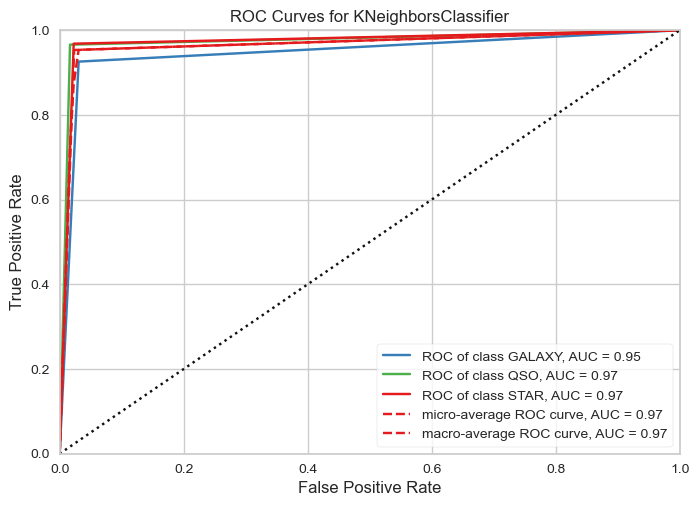

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [59]:
visualizer = ROCAUC(model, classes=le.classes_, cmap='PuBu')

set_palette('bold')

visualizer.fit(X_train_sc, y_train)
visualizer.score(X_test_sc, y_test)
visualizer.show()

### Decision Tree

#### Choosing Max Depth

Using the cross validation method to choose the best max depth.

In [16]:
hyperParamsMaxDepth = [1, 2, 3, 5, 8, 13, 21, 34, 55]
bestMaxDepth, bestAcc = 0, 0
meanAccs = []

In [17]:
for maxDepth in hyperParamsMaxDepth:
    accuracies = []

    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, validation_index in k_fold.split(X_train_sc):
        X_train_fold, X_validation_fold = X_train_sc.iloc[train_index], X_train_sc.iloc[validation_index]
        y_train_fold, y_validation_fold = y_train.iloc[train_index], y_train.iloc[validation_index]

        model = DecisionTreeClassifier(criterion='entropy', max_depth=maxDepth, random_state=42)
        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_validation_fold)
        acc = accuracy_score(y_validation_fold, y_pred)
        accuracies.append(acc)

    meanAcc = np.mean(accuracies)
    meanAccs.append(meanAcc)

    if meanAcc > bestAcc:
        bestAcc = meanAcc
        bestMaxDepth = maxDepth

print('Mean Accuracies: ', meanAccs)
print(f'Best Max Depth: {bestMaxDepth}')
print(f'Best Accuracy: {bestAcc}')

Mean Accuracies:  [0.6666566651802804, 0.9409013553096921, 0.9409213818448638, 0.9642824837662216, 0.9751869835532601, 0.9748966170917301, 0.9725334779202347, 0.9717624505508591, 0.9718725992516051]
Best Max Depth: 8
Best Accuracy: 0.9751869835532601


Plotting the accuracy x max depth graph.

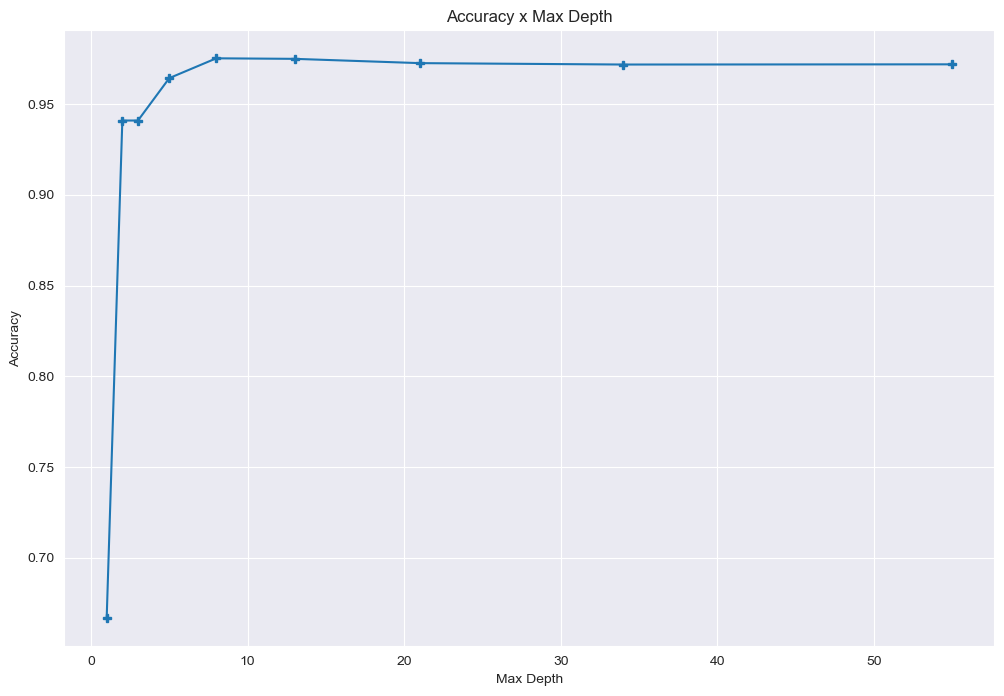

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(hyperParamsMaxDepth, meanAccs, 'P-')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy x Max Depth')
plt.show()

#### Choosing the best max depth and metric

Using the Grid search cv method to choose the best metric and max depth.

In [15]:
parameters = {'criterion': ['gini', 'entropy'],
                'max_depth': [1, 2, 3, 5, 8, 13, 21, 34, 55],
                'min_samples_split': [2, 3, 5, 8, 13, 21, 34, 55]}


grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

best_criterion = grid_search.best_params_['criterion']
best_max_depth = grid_search.best_params_['max_depth']

print(f'Best Accuracy: {grid_search.best_score_}')
print(f'Best Criterion: {best_criterion}')
print(f'Best Max Depth: {best_max_depth}')

Best Accuracy: 0.9762584269980052
Best Criterion: entropy
Best Max Depth: 13


In [16]:
best_min_samples_split = grid_search.best_params_['min_samples_split']
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 55}


#### Feature Importance

In [17]:
model = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)

model.fit(X_train_sc, y_train)

importances = model.feature_importances_

Plotting the feature importance graph.

Text(0.5, 1.0, 'Importance')

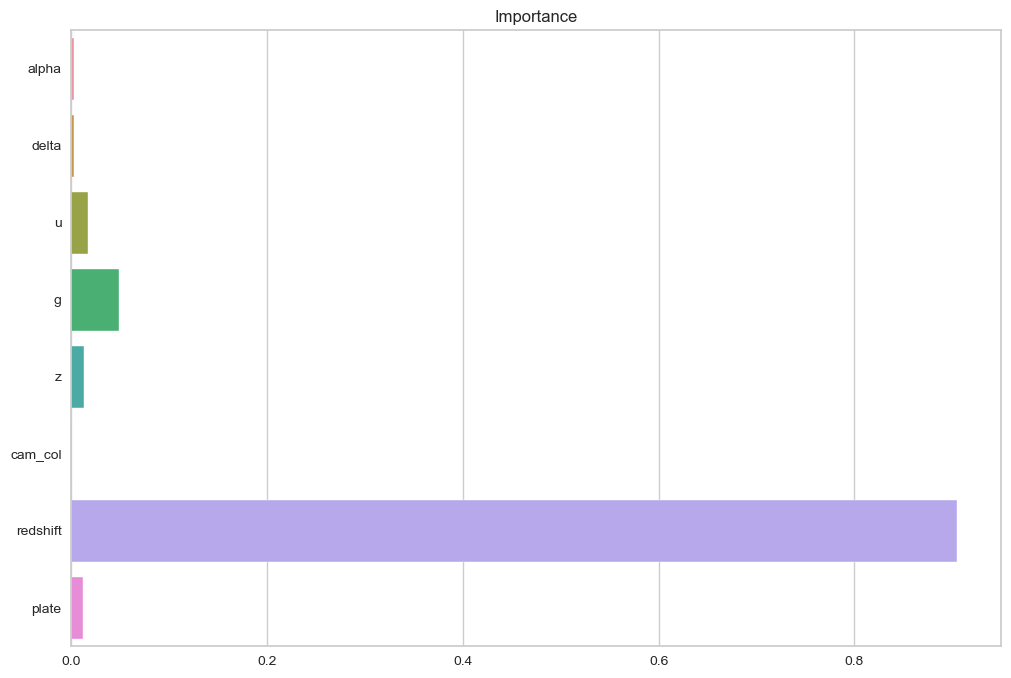

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=X_train_sc.columns)
plt.title('Feature Importance')
plt.title('Importance')

#### Choosing the top 5 features importance

In [19]:
five_best_features = importances.argsort()[-5:][::-1]

print('Five Best Features: ', X_train_sc.columns[five_best_features])

Five Best Features:  Index(['redshift', 'g', 'u', 'z', 'plate'], dtype='object')


#### Traning and Testing with the best parameters and features

In [20]:
X_train_sc_best = X_train_sc.iloc[:, five_best_features]
X_test_sc_best = X_test_sc.iloc[:, five_best_features]

model = DecisionTreeClassifier(criterion=best_criterion, max_depth=best_max_depth, random_state=42)

model.fit(X_train_sc_best, y_train)

y_pred = model.predict(X_test_sc_best)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     17833
           1       0.97      0.96      0.96     17834
           2       1.00      1.00      1.00     17834

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



#### Confusion Matrix

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


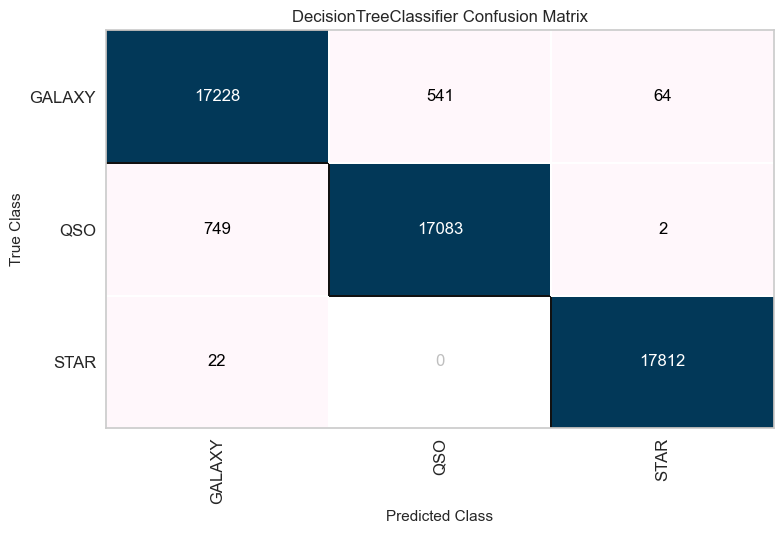

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [21]:
cm = ConfusionMatrix(model, classes=le.classes_, cmap='PuBu')

cm.fit(X_train_sc_best, y_train)
cm.score(X_test_sc_best, y_test)
cm.show()

#### ROC Curve

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


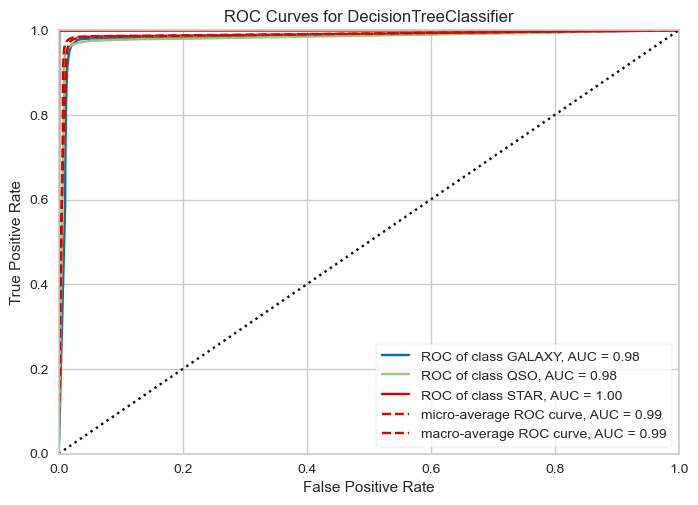

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [22]:
roc = ROCAUC(model, classes=le.classes_, cmap='PuBu')

roc.fit(X_train_sc_best, y_train)
roc.score(X_test_sc_best, y_test)
roc.show()

Exporting the decision tree graph.

In [36]:
dot_data = tree.export_graphviz(model,
                                 out_file=None,
                                 feature_names=X_train_sc_best.columns,
                                 class_names=le.classes_,
                                 filled=True,
                                 rounded=True,
                                 special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [37]:
pdf = graph.pipe(format='pdf')
with open('tree.pdf', 'wb') as f:
    f.write(pdf)

### Random Forest

Using the Grid search cv method to choose the best parameters.

In [45]:
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': [1, 2, 3, 5, 8, 13],
              'n_estimators': [100, 200, 500]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(
                           random_state=42,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1))

grid_search.fit(X_train_sc_best, y_train)

best_accuracy = grid_search.best_score_

best_params = grid_search.best_params_

print(f'Best Accuracy: {best_accuracy}')
print(f'Best Parameters: {best_params}')

Best Accuracy: 0.9809446532733078
Best Parameters: {'criterion': 'entropy', 'max_depth': 13, 'n_estimators': 500}


#### Traning and Testing with the best parameters and features

In [46]:
model = RandomForestClassifier(criterion=best_params['criterion'],
                               max_depth=best_params['max_depth'],
                               n_estimators=best_params['n_estimators'],
                               random_state=42)

model.fit(X_train_sc_best, y_train)

y_pred = model.predict(X_test_sc_best)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17833
           1       0.98      0.96      0.97     17834
           2       1.00      1.00      1.00     17834

    accuracy                           0.98     53501
   macro avg       0.98      0.98      0.98     53501
weighted avg       0.98      0.98      0.98     53501



#### Confusion Matrix

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9798695351488758

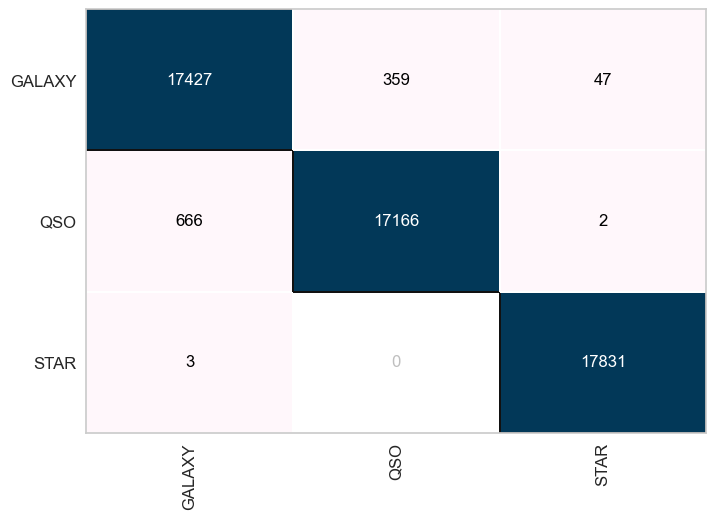

In [47]:
cm = ConfusionMatrix(model, classes=le.classes_, cmap='PuBu')

cm.fit(X_train_sc_best, y_train)

cm.score(X_test_sc_best, y_test)

#### ROC Curve

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9980835930120958

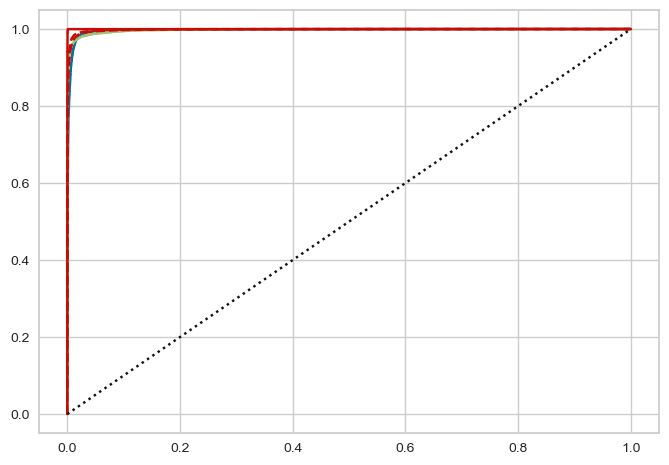

In [49]:
roc = ROCAUC(model, classes=le.classes_, cmap='PuBu')

roc.fit(X_train_sc_best, y_train)

roc.score(X_test_sc_best, y_test)

### Ada Boost

Using the Grid search cv method to choose the best parameters.

In [53]:
parameters = {'n_estimators': [50, 100, 200, 500],
                'learning_rate': [0.1, 0.5, 1, 2, 5, 10],
                'algorithm': ['SAMME', 'SAMME.R']}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_sc_best, y_train)

best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Best Accuracy: {best_accuracy}')
print(f'Best Parameters: {best_params}')

Best Accuracy: 0.9548599746535764
Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 50}


#### Traning and Testing with the best parameters and features

In [54]:
model = AdaBoostClassifier(n_estimators=best_params['n_estimators'],
                           learning_rate=best_params['learning_rate'],
                           algorithm=best_params['algorithm'],
                           random_state=42)

model.fit(X_train_sc_best, y_train)

y_pred = model.predict(X_test_sc_best)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93     17833
           1       0.95      0.91      0.93     17834
           2       0.99      1.00      1.00     17834

    accuracy                           0.95     53501
   macro avg       0.95      0.95      0.95     53501
weighted avg       0.95      0.95      0.95     53501



#### Confusion Matrix

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


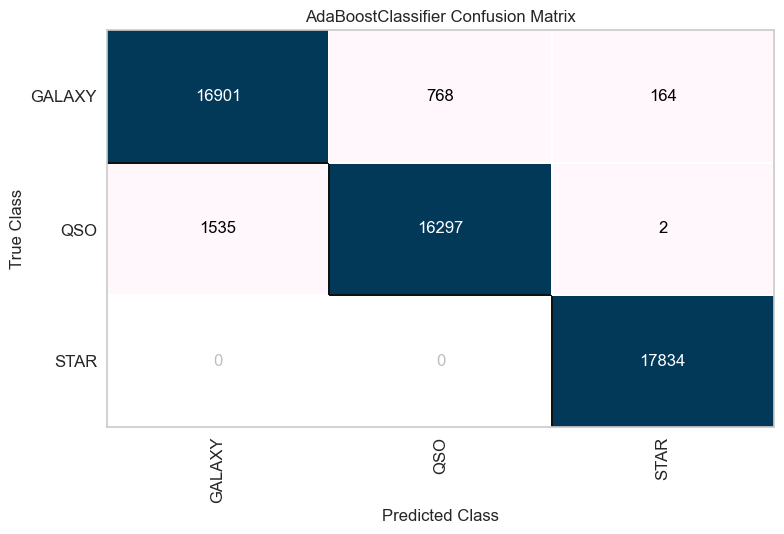

<Axes: title={'center': 'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
cm = ConfusionMatrix(model, classes=le.classes_, cmap='PuBu')

cm.fit(X_train_sc_best, y_train)

cm.score(X_test_sc_best, y_test)
cm.show()

#### ROC Curve

C:\Users\vitor_alves\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


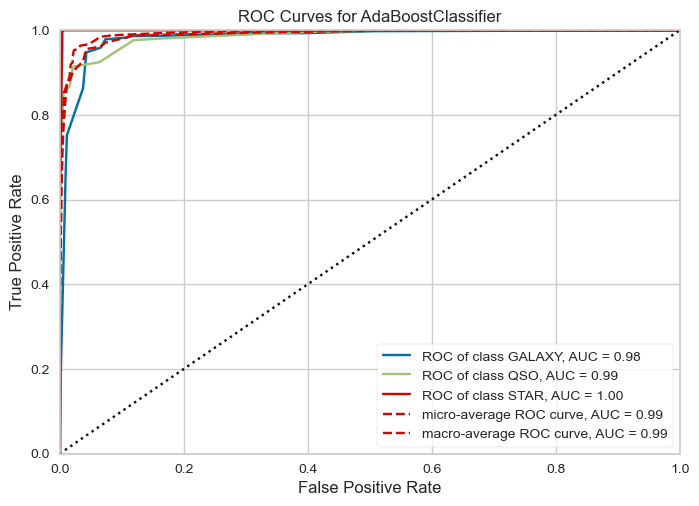

<Axes: title={'center': 'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
roc = ROCAUC(model, classes=le.classes_, cmap='PuBu')

roc.fit(X_train_sc_best, y_train)

roc.score(X_test_sc_best, y_test)
roc.show()

### Neural Network

Using the Grid search cv method to choose the best parameters.

In [23]:
def create_model(optimizer='adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))
    ann.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return ann

In [24]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=2)

C:\Users\vitor_alves\AppData\Local\Temp\ipykernel_48088\106175986.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=2)


In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [78]:
optimizers = ['adam', 'sgd']
batch_size = [16, 32, 64, 128]
epochs = [10, 20, 30, 50]
param_grid = dict(optimizer=optimizers, batch_size=batch_size, epochs=epochs)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=None)

grid_search.fit(X_train_sc_best, y_train, callbacks=[early_stopping])

Epoch 1/10
4994/4994 - 7s - loss: 0.2936 - accuracy: 0.8876 - 7s/epoch - 1ms/step
Epoch 2/10
4994/4994 - 6s - loss: 0.1307 - accuracy: 0.9611 - 6s/epoch - 1ms/step
Epoch 3/10
4994/4994 - 6s - loss: 0.1141 - accuracy: 0.9654 - 6s/epoch - 1ms/step
Epoch 4/10
4994/4994 - 6s - loss: 0.1063 - accuracy: 0.9675 - 6s/epoch - 1ms/step
Epoch 5/10
4994/4994 - 6s - loss: 0.1031 - accuracy: 0.9687 - 6s/epoch - 1ms/step
Epoch 6/10
4994/4994 - 6s - loss: 0.0992 - accuracy: 0.9700 - 6s/epoch - 1ms/step
Epoch 7/10
4994/4994 - 6s - loss: 0.0975 - accuracy: 0.9705 - 6s/epoch - 1ms/step
Epoch 8/10
4994/4994 - 6s - loss: 0.0972 - accuracy: 0.9702 - 6s/epoch - 1ms/step
Epoch 9/10
4994/4994 - 6s - loss: 0.0948 - accuracy: 0.9710 - 6s/epoch - 1ms/step
Epoch 10/10
4994/4994 - 6s - loss: 0.0942 - accuracy: 0.9714 - 6s/epoch - 1ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mism

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000023A42973A90>,
             param_grid={'batch_size': [16, 32, 64, 128],
                         'epochs': [10, 20, 30, 50],
                         'optimizer': ['adam', 'sgd']})

In [80]:
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print(f'Best Accuracy: {best_accuracy}')
print(f'Best Parameters: {best_params}')

Best Accuracy: 0.9732143998146057
Best Parameters: {'batch_size': 64, 'epochs': 50, 'optimizer': 'adam'}


In [25]:
best_batch_size = 64
best_epochs = 50
best_optimizer = 'adam'

print(f'Best Batch Size: {best_batch_size}')
print(f'Best Epochs: {best_epochs}')
print(f'Best Optimizer: {best_optimizer}')

Best Batch Size: 64
Best Epochs: 50
Best Optimizer: adam


#### Traning and Testing with the best parameters and features

In [30]:
model = create_model(optimizer=best_optimizer)

model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=2)

model.fit(X_train_sc_best, y_train, batch_size=best_batch_size, epochs=best_epochs, callbacks=[early_stopping])

Epoch 1/50


C:\Users\vitor_alves\AppData\Local\Temp\ipykernel_48088\2813094600.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=2)


1561/1561 - 4s - loss: 0.6052 - accuracy: 0.7439 - 4s/epoch - 2ms/step
Epoch 2/50
1561/1561 - 2s - loss: 0.2191 - accuracy: 0.9311 - 2s/epoch - 1ms/step
Epoch 3/50
1561/1561 - 2s - loss: 0.1510 - accuracy: 0.9547 - 2s/epoch - 1ms/step
Epoch 4/50
1561/1561 - 2s - loss: 0.1286 - accuracy: 0.9606 - 2s/epoch - 1ms/step
Epoch 5/50
1561/1561 - 2s - loss: 0.1200 - accuracy: 0.9625 - 2s/epoch - 1ms/step
Epoch 6/50
1561/1561 - 2s - loss: 0.1148 - accuracy: 0.9644 - 2s/epoch - 1ms/step
Epoch 7/50
1561/1561 - 2s - loss: 0.1096 - accuracy: 0.9660 - 2s/epoch - 1ms/step
Epoch 8/50
1561/1561 - 2s - loss: 0.1087 - accuracy: 0.9661 - 2s/epoch - 1ms/step
Epoch 9/50
1561/1561 - 2s - loss: 0.1043 - accuracy: 0.9675 - 2s/epoch - 1ms/step
Epoch 10/50
1561/1561 - 2s - loss: 0.1035 - accuracy: 0.9677 - 2s/epoch - 1ms/step
Epoch 11/50
1561/1561 - 2s - loss: 0.1007 - accuracy: 0.9683 - 2s/epoch - 1ms/step
Epoch 12/50
1561/1561 - 2s - loss: 0.1016 - accuracy: 0.9684 - 2s/epoch - 1ms/step
Epoch 13/50
1561/1561 - 

In [31]:
y_pred = model.predict(X_test_sc_best)

print(classification_report(y_test, y_pred))

1672/1672 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17833
           1       0.98      0.95      0.96     17834
           2       0.99      1.00      0.99     17834

    accuracy                           0.97     53501
   macro avg       0.97      0.97      0.97     53501
weighted avg       0.97      0.97      0.97     53501



#### Confusion Matrix

In [32]:
print(confusion_matrix(y_test, y_pred))

[[17205   390   238]
 [  958 16870     6]
 [   15     1 17818]]


#### ROC Curve

1672/1672 [==============================] - 2s 1ms/step


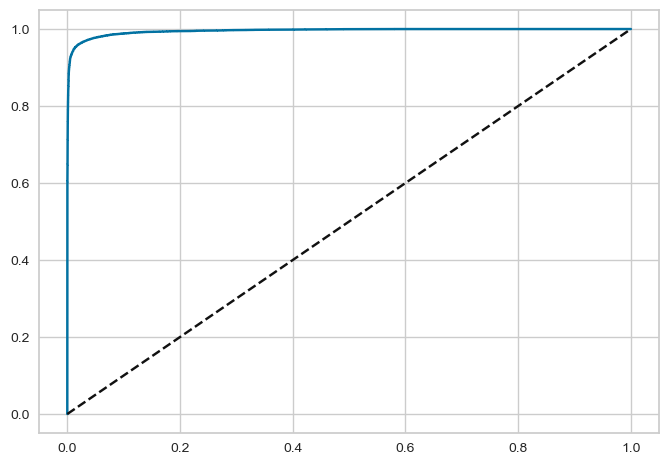

In [34]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test_sc_best)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

## 📝 Conclusion

- Use the correlation matrix and other metrics to remove the features that are highly correlated
    - Reducing of dimensionality
        - Less features to train
        - Simplify the model
        - Reduce the overfitting
        - Reduce the training time
- Neighbors Classifier
    - The best k was 3
    - The accuracy was 0.94
    - The ROC AUC was 0.97
- Decision Tree
    - The best max depth was 8
    - The accuracy was 0.97
    - The ROC AUC was 0.99
- Random Forest
    - The best parameters were
        - criterion = 'entropy'
        - max_features = 13
        - n_estimators = 500
    - The accuracy was 0.98
    - The ROC AUC was 0.99
- Ada Boost
    - The best parameters were
        - algorithm = 'SAMME'
        - learning_rate = 0.5
        - n_estimators = 50
    - The accuracy was 0.95
    - The ROC AUC was 0.99
- Neural Network
    - The best parameters were
        - batch_size = 64
        - epochs = 50
        - optimizer = 'adam'
    - The accuracy was 0.97
    - The ROC AUC was 0.99

### 🌐 References

- [Kaggle](https://www.kaggle.com/)
- [Scikit-Learn](https://scikit-learn.org/stable/)
- [Seaborn](https://seaborn.pydata.org/)
- [Yellowbrick](https://www.scikit-yb.org/en/latest/)
- [Pandas](https://pandas.pydata.org/)
- [Numpy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Graphviz](https://graphviz.org/)
- [Resume About ROC - Alex Santos](https://ealexbarros.medium.com/o-que-%C3%A9-a-redu%C3%A7%C3%A3o-de-dimensionalidade-em-machine-learning-cc2a89e3cdec)
- [Programação Dinâmica Channel](https://www.youtube.com/@pgdinamica)

In [ ]:
#### Choosing the best parameters